<a href="https://colab.research.google.com/github/OduaiAbrb/Salaries-task-for-Shai-Assignment-/blob/main/Copy_of_ShAI_BootCamp_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [ ]:
# Number of (Rows, Columns)
df.shape

(148654, 13)

In [ ]:
# Data type for each column
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [ ]:
# Missing values in columns
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [ ]:
Mean = df['TotalPay'].mean()
Median = df['TotalPay'].median()
Mode = df['TotalPay'].mode()
MIN_Salary = df['TotalPay'].min()
MAX_Salary = df['TotalPay'].max()
Standers_DEV = df['TotalPay'].std()

print(f"Mean: {Mean:.2f}")
print(f"Median: {Median:.2f}")
print(f"Mode: {Mode}")
print(f"Min Salary: {MIN_Salary:.2f}")
print(f"Max Salary: {MAX_Salary:.2f}")
print(f"Standard Deviation: {Standers_DEV:.2f}")

Mean: 74768.32
Median: 71426.61
Mode: 0    0.0
Name: TotalPay, dtype: float64
Min Salary: -618.13
Max Salary: 567595.43
Standard Deviation: 50517.01


In [ ]:
name_not_provided = df['EmployeeName'].isin(["Not provided"])
df = df.drop(df[name_not_provided].index)
df = df.drop('Notes', axis=1)
df = df.drop('Status', axis=1)

In [ ]:
# Using the Mean way to fill the missing values:
# 1- It is simple to implement and computationally efficient.
# 2- It can be used for both continuous and categorical data.

df['BasePay'].fillna(df['BasePay'].mean(),inplace=True)
df['Benefits'].fillna(df['Benefits'].mean(),inplace=True)
df['TotalPay'] = df['BasePay'] + df['OvertimePay'] + df['OtherPay']
df['TotalPayBenefits'] = df['TotalPay'] + df['Benefits']


In [ ]:
# Checking again for the missing values after filling it with the
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

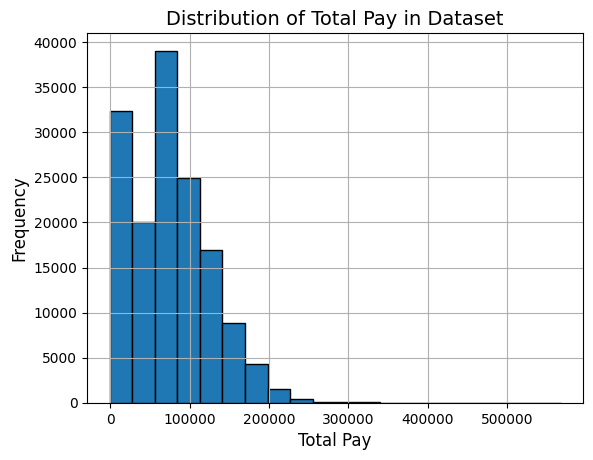

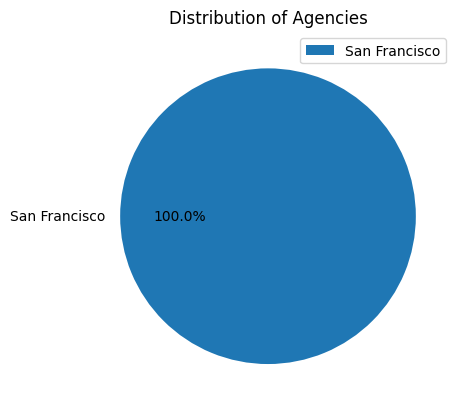

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['TotalPay'], bins=20, edgecolor='black')
plt.xlabel('Total Pay', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Total Pay in Dataset', fontsize=14)
plt.grid(True)
plt.show()

plt.pie(df['Agency'].value_counts(), labels=df['Agency'].value_counts().index, autopct="%1.1f%%")
plt.title("Distribution of Agencies")
plt.legend()
plt.show()

<ipython-input-38-d9abd682211a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Agency')['BasePay','OvertimePay','OtherPay','Benefits','TotalPay', 'TotalPayBenefits'].mean()
<ipython-input-38-d9abd682211a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Agency')['BasePay','OvertimePay','OtherPay','Benefits','TotalPay', 'TotalPayBenefits'].mean().plot(kind='bar')


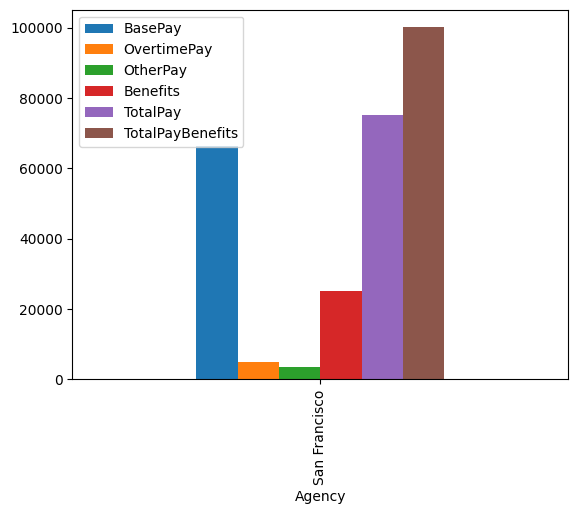

In [ ]:
df.groupby('Agency')['BasePay','OvertimePay','OtherPay','Benefits','TotalPay', 'TotalPayBenefits'].mean()
df.groupby('Agency')['BasePay','OvertimePay','OtherPay','Benefits','TotalPay', 'TotalPayBenefits'].mean().plot(kind='bar')
plt.show()

<ipython-input-39-dea0ca36c0b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


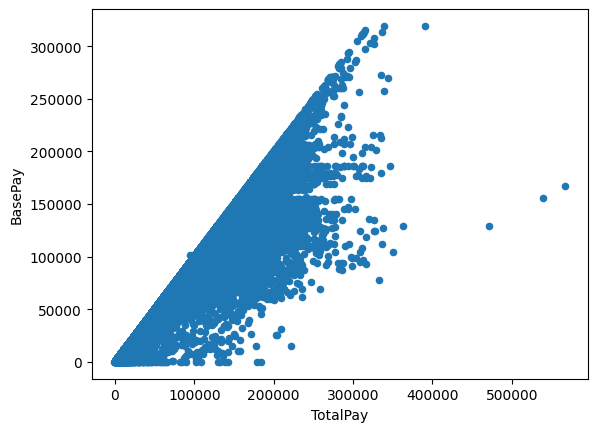

In [ ]:
df.corr()
df.plot(kind='scatter', x='TotalPay', y='BasePay')
plt.show()

# Good Luck!


#Report
The dataset contains information about the salaries of employees in an organization. The dataset has 148654 rows and 13 columns. The columns are:
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay'
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'

#Dataset Summary

Number of records: 148,650
Number of columns: 13
Data types: Integers, string, floats

#Column Information

Columns without missing values: Id, EmployeeName, JobTitle, Year
Columns with missing values: BasePay (609 missing), OvertimePay (4 missing), OtherPay (4 missing), Benefits (36,163 missing), TotalPay (0 missing), TotalPayBenefits (0 missing), Notes (148,654 missing), Agency (0 missing), Status (148,654 missing)

#Salary Statistics

- Mean total pay: $74,768.32$
- Median total pay: $71,426.61$
- Mode total pay: $0$ (most frequent value)
- Minimum total pay: -$618.13$
- Maximum total pay: $567,595.43$
- Standard deviation of total pay: $50,517.01$

#Key Observations

Significant number of missing values in the Benefits column (24.75%).
Presence of negative values in the TotalPay column, warranting further investigation.
Wide range of salaries, suggesting potential salary disparities or outliers.
Using the $Mean$ filling method, which fills the missing values in the column with the mean of the values in that column, to fill the missing values, and also droping columns (Notes, Status) to reduce the dimention so the data will be easy to work with.


#Additional Insights from Visualization (referencing the scatter plot)

Strong positive correlation between TotalPay and BasePay: This suggests that base pay is a major contributor to overall compensation.
Variation in TotalPay at higher BasePay levels: Implies the influence of other factors beyond base pay in determining total compensation.
